In [1]:
!pip install pandasql
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=61feb6537b0d9228e12bbc181069b709eda33468146cdbc8cccd9deb7f72dc72
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
matches = pd.read_csv('matches.csv', index_col =[0])
fighters = pd.read_csv('fighters.csv',index_col = [0])

In [ ]:
matches['weight_class'].unique()

In [ ]:
matches[matches['weight_class'].str.contains('Women')].groupby('Winner').size()

In [ ]:
ps.sqldf('''
SELECT * 
FROM matches
ORDER BY date DESC
''')

# Problems with missing data

## Missing Age data

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
R = matches[matches['R_age'].isnull()]['R_fighter'].to_frame().value_counts().to_frame()
R

,0
R_fighter,
Alex Hunter,2
Keith Rockel,1
Amaury Bitetti,1
Ben Earwood,1
Bob Cook,1
Brad Gumm,1
Dwayne Cason,1
Frank Hamaker,1
Geza Kalman,1


In [ ]:
B = matches[matches['B_age'].isnull()]['B_fighter'].to_frame().value_counts().to_frame()
B

,0
B_fighter,
Zane Frazier,2
Chase Gormley,2
Royce Alger,2
Moti Horenstein,2
Michael Patt,2
David Lee,2
Jason Gilliam,2
Jason Godsey,2
Jay Silva,2


In [ ]:
total = pd.concat([B, R], axis=0)
total

,0
B_fighter,
Zane Frazier,2
Chase Gormley,2
Royce Alger,2
Moti Horenstein,2
Michael Patt,2
David Lee,2
Jason Gilliam,2
Jason Godsey,2
Jay Silva,2


In [ ]:
a = matches[matches['B_fighter'].isin(one_match_fighter['Fighter'])][['B_fighter','date']].rename(columns={'B_fighter':'Fighter'})

NameError: ignored

In [ ]:
matches[(matches['R_fighter'].isin(a)) | (matches['B_fighter'].isin(a))].sort_values('date', ascending=False)

NameError: ignored

In [ ]:
# matches.loc[103,'R_age'] = 2019 - 1992

In [ ]:
def count_null(column):
    return column.isnull().sum()

In [ ]:
matches.apply(count_null,axis = 0).to_frame()


,0
R_fighter,0
B_fighter,0
Referee,23
date,0
location,0
Winner,0
title_bout,0
weight_class,0
no_of_rounds,0
B_current_lose_streak,0


## Missing Height

In [ ]:
matches[(matches['R_Height_cms'].isnull()) | (matches['B_Height_cms'].isnull())][['R_fighter','R_Height_cms','B_fighter','B_Height_cms']]

,R_fighter,R_Height_cms,B_fighter,B_Height_cms
5029,Jack Nilson,NaN,Saeed Hosseini,NaN


In [ ]:
# matches.loc[5134,'B_Height_cms'] = 182.88

In [ ]:
# matches.to_csv('/content/gdrive/MyDrive/UFC - Data/matches.csv')

# Useful information

## Number of female fighters (1993 - 2019)

In [ ]:
# Number of female fighters (1993 - 2019)
female_fighters = ps.sqldf('''
SELECT R_fighter as Female_Fighter FROM matches WHERE weight_class LIKE "%WOMEN%"
UNION 
SELECT B_fighter as Female_Fighter FROM matches WHERE weight_class LIKE "%WOMEN%"
''')
female_fighters

## Number of male fighters (1993 - 2019)

In [ ]:
matches[['R_fighter','']]

KeyError: ignored

In [ ]:
# Number of male fighters
male_fighters = ps.sqldf('''
SELECT R_fighter as Male_Fighter FROM matches WHERE weight_class NOT LIKE "%WOMEN%"
UNION 
SELECT B_fighter as Male_Fighter FROM matches WHERE weight_class NOT LIKE "%WOMEN%"
''')
male_fighters

## Compare number of Female Fighters and Female Fighters

In [ ]:
mvsfm = [male_fighters.count(),female_fighters.count()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Number male vs female fighters')

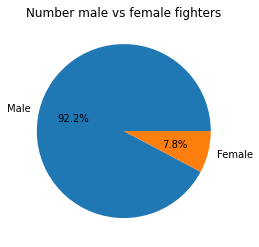

In [ ]:
male_fighters.count()
compare = pd.concat([male_fighters.count(), female_fighters.count()], axis=0).reset_index().rename(columns={'index':'sex',0:'count'})
plt.pie(mvsfm, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Number male vs female fighters')

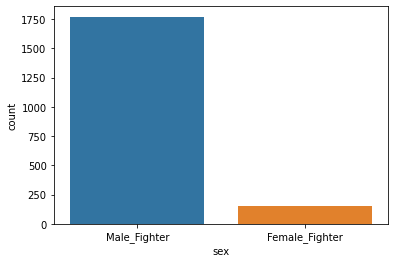

In [ ]:
male_fighters.count()
compare = pd.concat([male_fighters.count(), female_fighters.count()], axis=0).reset_index().rename(columns={'index':'sex',0:'count'})
sns.barplot(data=compare,x='sex', y = 'count')

## Average matches of fighter

In [ ]:
B1 = matches.groupby('B_fighter')[['R_fighter']].count().rename(columns={'B_fighter':'Fighter','R_fighter':'Number_of_matches'})

In [ ]:
R1 = matches.groupby('R_fighter')[['B_fighter']].count().rename(columns={'R_fighter':'Fighter','B_fighter':'Number_of_matches'})

In [ ]:
total1 = pd.concat([B1, R1], axis=0).reset_index()
total1

,index,Number_of_matches
0,Aaron Brink,1
1,Aaron Phillips,1
2,Aaron Riley,5
3,Aaron Rosa,2
4,Aaron Simpson,3
5,Aaron Wilkinson,1
6,Abdul Razak Alhassan,3
7,Abdul-Kerim Edilov,1
8,Abel Trujillo,7
9,Abner Lloveras,1


In [ ]:
Number_of_matches = total1.rename(columns={'index':'Fighter'}).groupby('Fighter')['Number_of_matches'].sum().sort_values(ascending=False).to_frame()
Number_of_matches

In [ ]:
Number_of_matches.describe()

In [ ]:
Q1 = Number_of_matches.quantile(0.25)
Q3 = Number_of_matches.quantile(0.75)
IQR = Q3 - Q1

upper_whisker = Q3 + 1.5*IQR
lower_whiker = Q1 - 1.5*IQR
print(upper_whisker, lower_whiker)

In [ ]:
sns.boxplot(data=Number_of_matches, y = 'Number_of_matches')

In [ ]:
Number_of_matches[Number_of_matches['Number_of_matches']>14]

## Average age of Fighters in matches

## Number of Fighter only have 1 matches

In [ ]:
one_match_fighter = Number_of_matches[Number_of_matches['Number_of_matches'] == 1].reset_index()
a = matches[matches['B_fighter'].isin(one_match_fighter['Fighter'])][['B_fighter','date']].rename(columns={'B_fighter':'Fighter'})
a['date'] = pd.to_datetime(a['date'])

b = matches[matches['R_fighter'].isin(one_match_fighter['Fighter'])][['R_fighter','date']].rename(columns={'R_fighter':'Fighter'})
b['date'] = pd.to_datetime(b['date'])
total2 = pd.concat([b[b['date'] < '2019-01-01'], a[a['date'] < '2019-01-01']], axis=0)
total2

## Number of Fighter have less or equal then 3 matches.

In [ ]:
two_match_fighter = Number_of_matches[Number_of_matches['Number_of_matches'] <= 3].reset_index()
a = matches[matches['B_fighter'].isin(two_match_fighter['Fighter'])][['B_fighter','date']].rename(columns={'B_fighter':'Fighter'})
a['date'] = pd.to_datetime(a['date'])

b = matches[matches['R_fighter'].isin(two_match_fighter['Fighter'])][['R_fighter','date']].rename(columns={'R_fighter':'Fighter'})
b['date'] = pd.to_datetime(b['date'])
total3 = pd.concat([b[b['date'] < '2019-01-01'], a[a['date'] < '2019-01-01']], axis=0)
total3

In [ ]:
c=total3.count().to_frame().loc[['Fighter']].rename(columns={0:'count'})[['count']].reset_index()
b=compare.sum().to_frame().T[['count']].reset_index()
a=total2.count().to_frame().loc[['Fighter']].rename(columns={0:'count'})[['count']].reset_index()
compare3 = pd.concat((a,c,b), axis=0)
compare3.iloc[0,0] = 'a' #Just change to random value to merge 3 DataFrame into 1.
compare3
sns.barplot(data=compare3, y = 'index', x = 'count',ci=None)
plt.yticks(ticks=[0, 1, 2],
           labels=['One matches Fighter','Fighter have less than 4 Matches', 'Total number of Fighter'])
plt.ylabel('')

## Fighter have highest Win streak in each weight_class

In [ ]:
ps.sqldf('''
SELECT R_fighter, max(R_longest_win_streak) as Highest_win_streak, weight_class
FROM matches
GROUP BY weight_class
ORDER BY Highest_win_streak DESC
''')

,R_fighter,Highest_win_streak,weight_class
0,Anderson Silva,16,Middleweight
1,Anderson Silva,15,Light Heavyweight
2,Demetrious Johnson,13,Flyweight
3,Max Holloway,13,Lightweight
4,Max Holloway,12,Featherweight
5,Georges St-Pierre,11,Welterweight
6,Royce Gracie,10,Catch Weight
7,Junior Dos Santos,9,Heavyweight
8,Royce Gracie,9,Open Weight
9,Joanna Jedrzejczyk,8,Women's Strawweight


In [ ]:
ps.sqldf('''
WITH lis AS
(
SELECT * FROM (
SELECT B_fighter as Fighter, max(B_longest_win_streak) as Highest_win_streak, weight_class
FROM matches
GROUP BY weight_class
ORDER BY Highest_win_streak DESC
)
UNION
SELECT * FROM (
SELECT R_fighter as Fighter, max(R_longest_win_streak) as Highest_win_streak, weight_class
FROM matches
GROUP BY weight_class
ORDER BY Highest_win_streak DESC
)
)
SELECT Fighter, max(Highest_win_streak) as Highest_win_streak, weight_class
FROM lis
GROUP BY Fighter  
ORDER BY Highest_win_streak DESC
''')

In [ ]:
#highest winning streak (Red) - *** ON EACH WEIGHT-CLASS
ps.sqldf('''
SELECT R_fighter, R_longest_win_streak 
FROM matches ORDER BY R_longest_win_streak DESC LIMIT 1
''')

In [ ]:
#highest winning streak (Blue)
ps.sqldf('''
SELECT B_fighter, B_longest_win_streak FROM matches ORDER BY B_longest_win_streak DESC LIMIT 1
''')

## Top 5 Fighter have the most number of Title bouts

In [ ]:
#
ps.sqldf('''
WITH lis AS
(
SELECT *
FROM
(
SELECT B_fighter as Fighter, Max(B_total_title_bouts) as Total_title_bouts
FROM matches
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
)
UNION ALL

SELECT *
FROM
(
SELECT R_fighter as Fighter, Max(R_total_title_bouts) as Total_title_bouts
FROM matches
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
)
)
SELECT Fighter, max(Total_title_bouts) as Total_title_bouts FROM lis
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
LIMIT 5
''')

## Number of Location


In [ ]:
ps.sqldf('''
SELECT count(location) as Times, location
FROM matches
group by location
ORDER BY Times DESC
''')